### Env Setup and Data Load

In [75]:
# Enviroment setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Load File
file_path = r'C:\Users\RafaelFagundes\Downloads\DataRides.csv'

df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71608 entries, 0 to 71607
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Transaction ID            71608 non-null  int64  
 1   Time                      71608 non-null  object 
 2   Day                       71608 non-null  object 
 3   Week                      71608 non-null  object 
 4   Rider ID                  71608 non-null  int64  
 5   Pickup distance (meters)  71608 non-null  int64  
 6   Ride distance (meters)    71595 non-null  float64
 7   Ride duration (seconds)   71595 non-null  float64
 8   Client rating             71369 non-null  float64
 9   Client paid (Euros)       71608 non-null  float64
 10  Ride price (Euros)        71608 non-null  float64
 11  Pickup time (minutes)     71608 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 6.6+ MB


In [77]:
# Create Hour column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

C:\Users\RafaelFagundes\AppData\Local\Temp\ipykernel_5932\251246162.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [78]:
# Data Sample
df.head()

,Transaction ID,Time,Day,Week,Rider ID,Pickup distance (meters),Ride distance (meters),Ride duration (seconds),Client rating,Client paid (Euros),Ride price (Euros),Pickup time (minutes),Hour
0,92309986,11:59 PM,Monday,Week 2,17801128,198,5249.0,695.0,5.0,7.31,7.31,2:50,23
1,92309984,11:57 PM,Monday,Week 2,20448764,1653,19420.0,1760.0,5.0,21.11,21.11,4:40,23
2,92309982,11:57 PM,Monday,Week 2,20470064,2669,5370.0,616.0,5.0,7.16,7.16,5:59,23
3,92309976,11:55 PM,Monday,Week 2,20650920,169,13565.0,1359.0,5.0,15.58,15.58,0:38,23
4,92309974,11:55 PM,Monday,Week 2,13006764,558,11624.0,1083.0,5.0,13.22,13.22,2:29,23


### Creation of Main KPIs

In [79]:
# Total Rides
total_rides = len(df)

# Rides per Day
rides_per_day = (
    df["Day"]
    .value_counts()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
)

# Average Rides per Day
average_rides_per_day = round(float(rides_per_day.mean()), 0)

# Average Ride Distance (km)
average_ride_distance = round(float(df["Ride distance (meters)"].mean() / 1000), 2)

# Average Ride Duration (min)
average_ride_duration = round(float(df["Ride duration (seconds)"].mean() / 60), 2)

# Average Pickup Distance (meters)
avg_pick_distance = round(float(df["Pickup distance (meters)"].mean()), 2)

# Average Revenue per Ride (€)
avg_revenue_per_ride = round(float(df["Client paid (Euros)"].mean()), 2)

# Total Revenue (€)
total_revenue = round(float(df["Client paid (Euros)"].sum()), 2)

# Average Client Rating
avg_client_rating = round(float(df["Client rating"].mean()), 2)

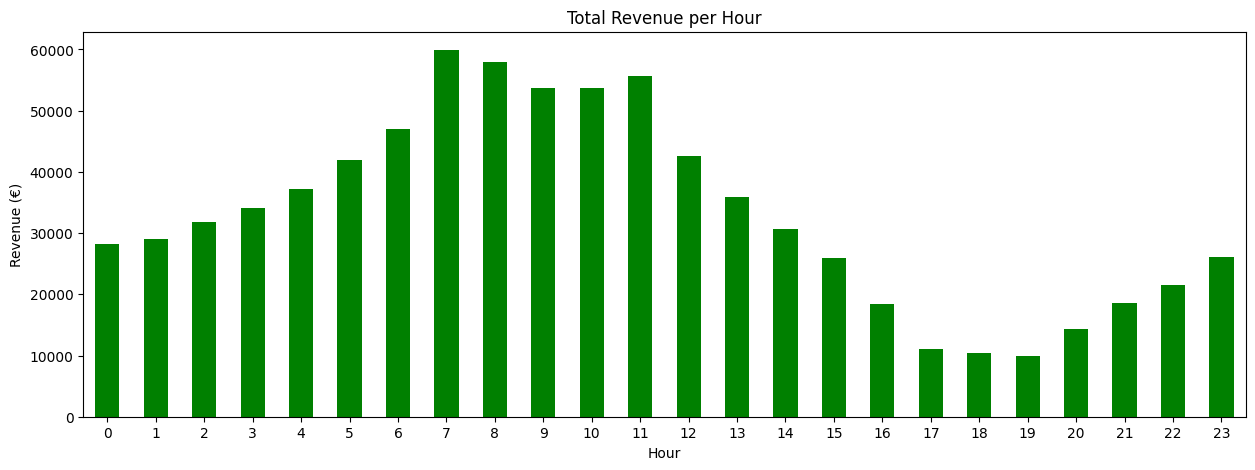

In [80]:
# Total Revenue per Hour
df_grouped_revenue = df.groupby(["Hour"])["Client paid (Euros)"].sum()


plt.figure(figsize=(15, 5))
df_grouped_revenue.plot(kind="bar", color="green")
plt.title("Total Revenue per Hour")
plt.xlabel("Hour")
plt.ylabel("Revenue (€)")
plt.xticks(rotation=0)
plt.show()

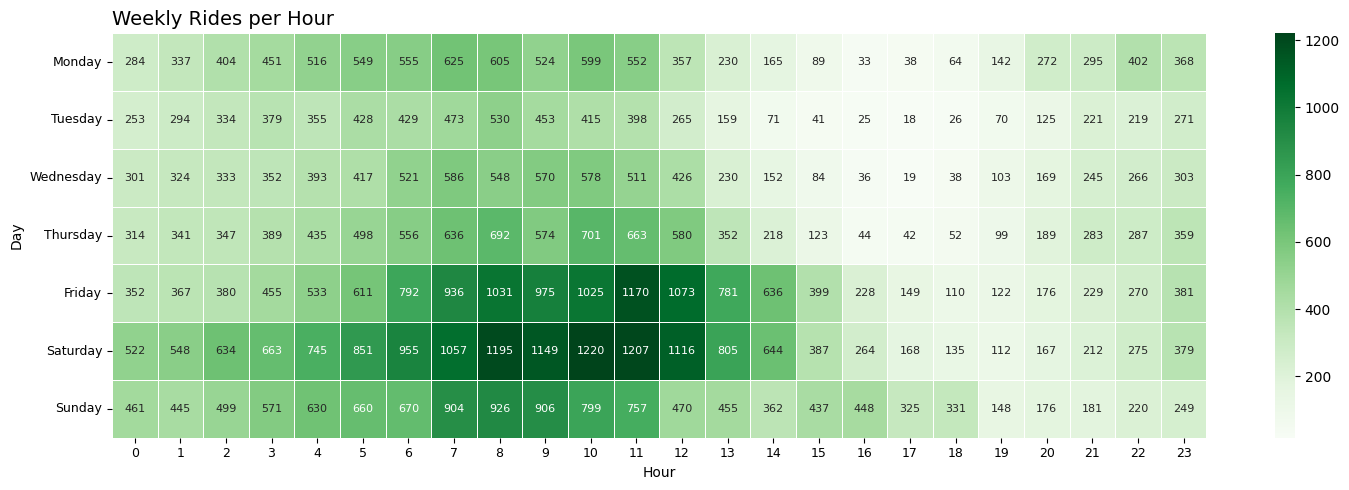

In [81]:
# Weekly Rides per Hour
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

df_grouped = df.groupby(["Day", "Hour"]).size().unstack(fill_value=0).reindex(day_order)

plt.figure(figsize=(15, 5))
sns.heatmap(
    df_grouped,
    cmap="Greens",
    annot=True,
    fmt=".0f",
    cbar=True,
    annot_kws={"size": 8},
    linewidths=0.5,
)

plt.title("Weekly Rides per Hour", fontsize=14, loc="left")
plt.xlabel("Hour", fontsize=10)
plt.ylabel("Day", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9, rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Insights

In [84]:
print(f"Total number of rides: {total_rides}")
print(f"Average number of rides per day: {average_rides_per_day}")
print(f"Average ride distance: {average_ride_distance} km")
print(f"Average ride duration: {average_ride_duration} minutes")
print(f"Average pickup distance: {avg_pick_distance} meters")
print(f"Average revenue per ride: €{avg_revenue_per_ride}")
print(f"Total revenue generated: €{total_revenue}")
print(f"Average client rating: {avg_client_rating} / 5")


Total number of rides: 71608
Average number of rides per day: 10230.0
Average ride distance: 8.11 km
Average ride duration: 15.23 minutes
Average pickup distance: 1461.14 meters
Average revenue per ride: €11.11
Total revenue generated: €795828.48
Average client rating: 4.79 / 5
